Individual Planning Stage
-
In this project, I will perform statistical modeling and analysis using data collected through a Minecraft server set up by a UBC Computer Science team. 

I plan to address the following research question:
What kinds of players of the Minecraft server are likely to contribute a large amount of data? 

Through visualization, I will present insight into these relationships, which may help inform the team's research. I will load the datasets, one with player information and another recording each session hosted by the server, below.

In [48]:
library(tidyverse)
library(tidymodels)
library(repr)

In [64]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Summary statistics of both datasets are presented below:

From the information generated above after loading the data, we can see that "players" has 196 observations, while "sessions" has 1535 observations. This means we have data on 1535 Minecraft sessions run by 196 different players. 

The variables in the "sessions" dataset are:
- hashedEmail (the user identification of the player)
- start_time (the start time of the session)
- end_time (the end time of the session)
- original_start_time and original end_time (unspecified raw numbers collected as time data)

The variables in the "players" dataset are:
- experience (the player's level of Minecraft experience)
- subscribe (whether or not the player is subscribed to the game-related newsletter)
- hashedEmail (the user identification of the player)
- played_hours (the total number of hours spent on the server)
- name (the player's name)
- gender (the player's gender)
- age (the player's age)

In [65]:
summary_players <- players |>
summarize(mean_hrs = mean(played_hours),
         mean_age = mean(Age, na.rm = TRUE))
summary_players

gender_freq <- players |>
count(gender)
gender_freq

mean_hrs,mean_age
<dbl>,<dbl>
5.845918,21.13918


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


In the code above, we found that each player was on the server for an average of 5.85 hours, and their average age was 21.14 years old. Of the players, 2 are agender; 37 are female; 124 are male; 15 are non-binary; 6 are two-spirited; 1 identifies with a gender not listed here, and 11 prefer not to disclose their gender.

Upon my initial impression of the data, there are several potential issues:
1. The data appears to be skewed towards players who put in their information but may not have at all intended to produce data for the research.
2. It is not immediately clear how the variables for session start and end times can be manipulated to visualize patterns.
3. There may not be enough data from all groups in certain demographics (for example, for some of the gender identities and experience levels) to generalize findings in this analysis to greater populations. 

Focus Question
-
The specific question I will seek to answer in my analysis will be:

Can a player's age predict the amount of time they spend on this Minecraft server?

Here are some plots that can give a sense of the distribution within our explanatory and response variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


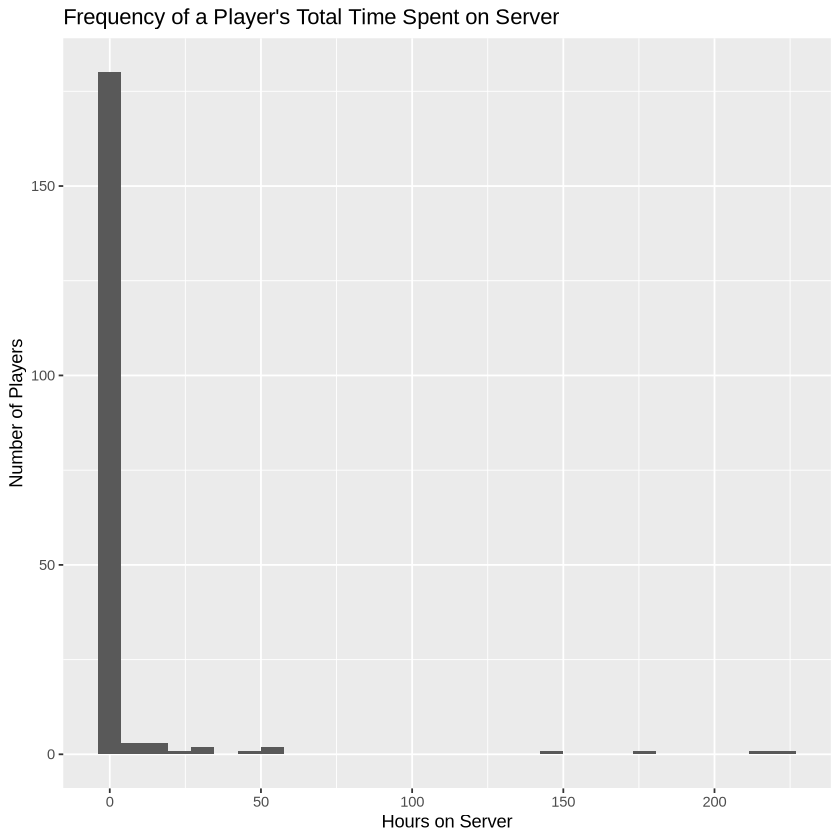

In [66]:
hrs_plot <- players |>
ggplot(aes(x = played_hours)) +
geom_histogram(position = "identity") + 
labs(title = "Frequency of a Player's Total Time Spent on Server", x = "Hours on Server", y = "Number of Players")
hrs_plot

As we can see, the graph is not very helpful because of the large proportion of players who spend little or no time on the server. This suggests we may need to take steps to minimize the influence of users with 0 hours played on our upcoming regression analysis. 

Here is a plot depicting age distribution:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


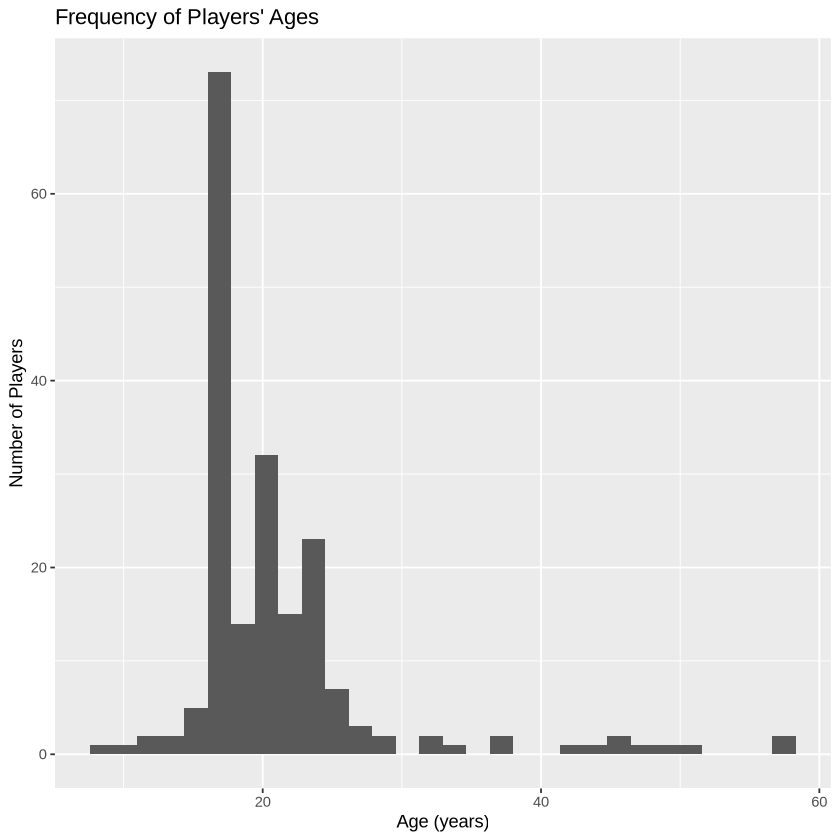

In [67]:
age_plot <- players |>
ggplot(aes(x = Age)) +
geom_histogram(position = "identity") +
labs(title = "Frequency of Players' Ages", x = "Age (years)", y = "Number of Players")
age_plot


This histogram tells us that there is a large cluster of players in their late teens, and also quite a lot in their early twenties.

Here is a very basic visualization of age plotted against hours spent on the server. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


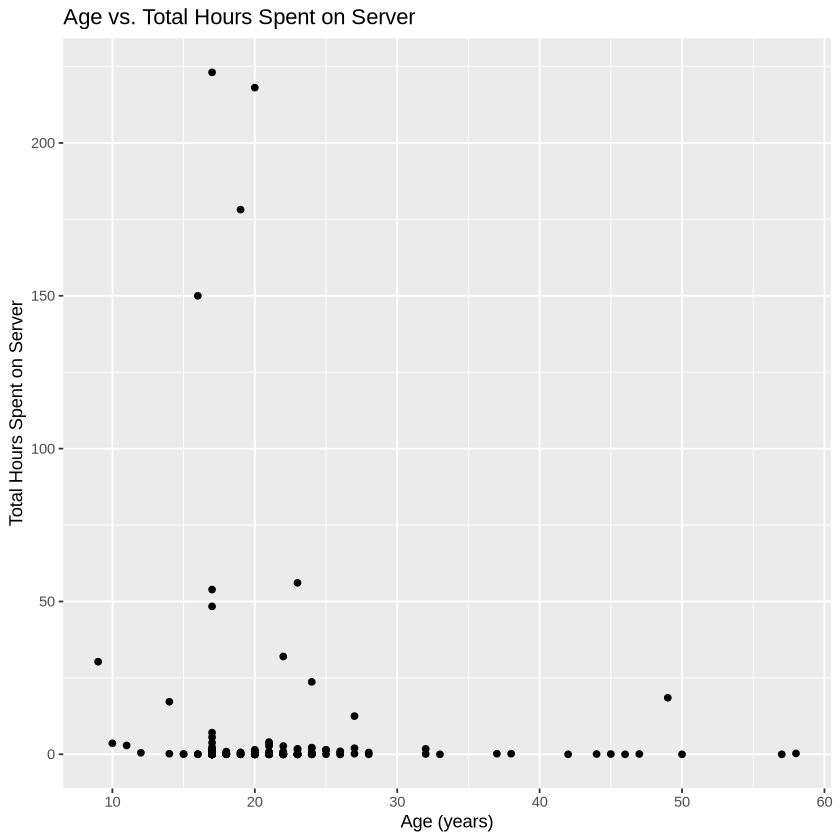

In [70]:
age_vs_hrs <- players |>
ggplot(aes(x = Age, y = played_hours)) +
geom_point() + 
labs(title = "Age vs. Total Hours Spent on Server", x = "Age (years)", y = "Total Hours Spent on Server")
age_vs_hrs

Even though this scatterplot still shows the prominence of players across all ages who don't end up using the server at all, we can see a slight trend of players in their late teens to spend the most time on the server, thereby providing the research team with the most data. 

I am planning on using linear regression to verify whether age can help us predict the total time a player spends on the server. I believe this model is appropriate because of general differences in characteristics that we commonly associate with age. For example, older people are generally less enthusiastic about video games than teenagers are. It is also a great method that may allow us to establish a correlation between variables, and is a very straightforward predictor if accurate. For a linear regression model to be appropriate, we'd have to assume the following things:
1. There is a linear relationship between the variables Age and Time Spent
2. This dataset is not disrupted by outliers
3. There is no further pattern (other than their balance on both sides of the regression line) within the residuals that we are left with once a line is fitted

Linear regression has its weaknesses. It tends to become a less accurate predictor for inputs on either extreme of the x-axis, and can end up not being effective at all if it is derived from a dataset with little linearity (and therefore large residuals). 

The linear regression model will be established through the calculation of a line-of-best-fit that leaves the least sum of squared residuals. Before that, it would be very helpful to eliminate all players with no time on the server at all, since they are inevitable regardless of age and will only skew the analysis if left untouched. 

I will split the data before forming a linear regression model. 80% of the data will be used to train the model, and 20% will be used to test it. 